170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 349s 2us/step


c:\Users\Artophilic\anaconda3\envs\practvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.3757 - loss: 1.6978 - val_accuracy: 0.5831 - val_loss: 1.1712
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.5999 - loss: 1.1327 - val_accuracy: 0.6559 - val_loss: 0.9771
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6728 - loss: 0.9224 - val_accuracy: 0.6666 - val_loss: 0.9555
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7173 - loss: 0.8059 - val_accuracy: 0.6955 - val_loss: 0.8848
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7558 - loss: 0.7001 - val_accuracy: 0.7052 - val_loss: 0.8592
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7880 - loss: 0.6118 - val_accuracy: 0.6983 - val_loss: 0.9010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8077 - loss: 0.5435 - val_accuracy: 0.7158 - val_loss: 0.8843
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8323 -

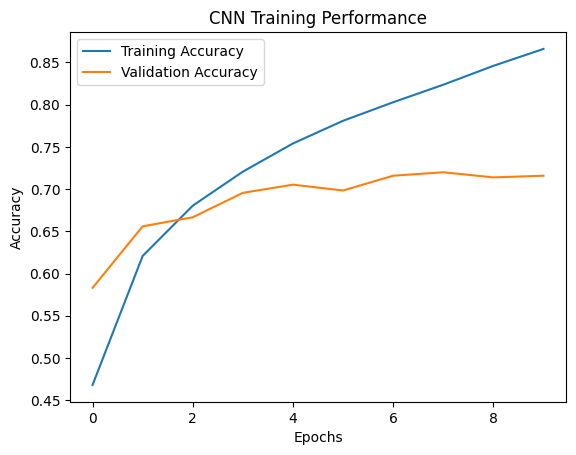

In [ ]:
''' 
Aim: Implement convolutional neural networks (CNNs) for image
classification tasks.

CNN consists of multiple layers, with convolution layer being central. 
It uses filters (kernels) that slide over the input image to detect basic features like edges,
corners, and textures. This helps capture spatial hierarchies in the image.

Pooling Layer: After convolution, pooling layers reduce the spatial dimensions of the image by
downsampling. Common methods include max pooling, which keeps the most significant
information, reducing both computational complexity and overfitting.

Activations Functions: Non-linear activation functions like ReLU (Rectified Linear Unit) are
applied after convolution and pooling to introduce non-linearity, allowing CNNs to model
complex patterns.

Fully connected layer: The final layers are fully connected, where the high-level features are
combined and used to perform classification or other tasks.

Advantage of CNN:
CNNs automatically learn relevant features during training, eliminating
the need for manual feature extraction, making them highly efficient for image classification and
computer vision tasks
'''
#Importing libraries
import tensorflow as tf #Main library for deep learning tasks.
from tensorflow import keras #High-level API within TensorFlow for building and training models.
import matplotlib.pyplot as plt #For plotting training results.
import numpy as np #For numerical operations

# Load CIFAR-10 dataset
#CIFAR-10 has 60,000 32x32 color images across 10 categories.
#50,000 used for training, 10,000 for testing.
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


# Normalize pixel values (0 to 255 → 0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define CNN architecture
model = keras.models.Sequential([ #stacks neural layers
    #1st Convolution layer: 32 filters, 3x3 kernel, ReLU activation
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    #Downsampling feature maps by 2x2
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    #Converting 3D feature maps to 1D vector
    keras.layers.Flatten(),
    #Dense: Fully connected hidden layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # 10 classes for CIFAR-10
    ])

# Compile the model
model.compile(optimizer='adam', #adam: Adaptive optimizer
    loss='sparse_categorical_crossentropy', #For integer labels
    metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy
#Accuracy is stored in history.history
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Performance')
plt.show()